In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/shibinbin/ibme/projects/Deepfold2


In [25]:
def read_transfac(filename):
    record = {}
    with open(filename, 'r') as f:
        pfm = {}
        for line in f:
            tag = line[:2]
            if tag in ('XX', '//'):
                continue
            content = line[3:].strip()
            if tag.isdigit():
                pfm[int(tag)] = [float(a) for a in content.split()]
            elif tag == 'PO':
                record[tag] = content.split()
            else:
                record[tag] = content
        pfm = [pfm[i] for i in range(1, len(pfm) + 1)]
        pfm = np.asarray(pfm)
        record['LEN'] = pfm.shape[0]
        record['PFM'] = pfm
        record['NSEQ'] = sum(pfm[0])
        p = (pfm + 1)/np.sum(pfm + 1, axis=1, keepdims=True)
        record['PWM'] = p
        record['INFOBIT'] = -np.sum(p*np.log(p))
    return record

transfac = read_transfac('data/JASPAR/vertebrates/MA0101.1.transfac')
transfac

{'AC': 'MA0101.1',
 'DE': 'MA0101.1 REL ; From JASPAR 2018',
 'ID': 'REL',
 'INFOBIT': 9.441512250944324,
 'LEN': 10,
 'NSEQ': 17.0,
 'PFM': array([[ 0.,  5.,  8.,  4.],
        [ 0.,  1., 15.,  1.],
        [ 1.,  0., 15.,  1.],
        [ 5.,  1.,  9.,  2.],
        [ 6.,  5.,  3.,  3.],
        [ 5.,  1.,  1., 10.],
        [ 1.,  0.,  0., 16.],
        [ 2.,  0.,  0., 15.],
        [ 0., 15.,  0.,  2.],
        [ 1., 16.,  0.,  0.]]),
 'PO': ['A', 'C', 'G', 'T'],
 'PWM': array([[0.04761905, 0.28571429, 0.42857143, 0.23809524],
        [0.04761905, 0.0952381 , 0.76190476, 0.0952381 ],
        [0.0952381 , 0.04761905, 0.76190476, 0.0952381 ],
        [0.28571429, 0.0952381 , 0.47619048, 0.14285714],
        [0.33333333, 0.28571429, 0.19047619, 0.19047619],
        [0.28571429, 0.0952381 , 0.0952381 , 0.52380952],
        [0.0952381 , 0.04761905, 0.04761905, 0.80952381],
        [0.14285714, 0.04761905, 0.04761905, 0.76190476],
        [0.04761905, 0.76190476, 0.04761905, 0.14285714],


In [39]:
import os
import pandas as pd
records = []
transfac_dir = 'data/JASPAR/vertebrates'
for filename in os.listdir(transfac_dir):
    transfac = read_transfac(os.path.join(transfac_dir, filename))
    records.append({'id': transfac['ID'], 
                    'n_seq': transfac['NSEQ'], 
                    'info_bit': transfac['INFOBIT'],
                    'accession': transfac['AC'],
                    'length': transfac['LEN']})
records = pd.DataFrame.from_records(records)
records = records.loc[:, ['accession', 'id', 'length', 'n_seq', 'info_bit']]
records = records.sort_values('n_seq', ascending=False)
records['accession'][:20].to_csv('metadata/jaspar_selected_ids.txt', header=False, index=False)
records.head()

,accession,id,length,n_seq,info_bit
230,MA0745.1,SNAI2,9,110707.0,5.902529
51,MA0670.1,NFIA,10,91919.0,5.424593
419,MA0498.2,MEIS1,7,77159.0,4.202617
48,MA0028.2,ELK1,10,67234.0,3.942467
148,MA0755.1,CUX2,10,62500.0,5.761031


In [ ]:
for accession in record['accession'][:10]:

(array([ 18.,  66., 158.,  83.,  95.,  44.,  63.,  28.,  15.,   9.]),
 array([ 6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. ]),
 <a list of 10 Patch objects>)

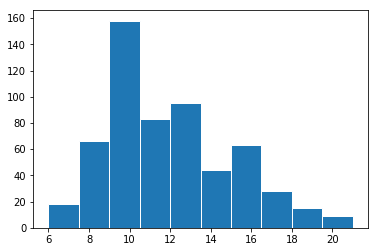

In [32]:
hist(records['length'], linewidth=1, edgecolor='w')

In [40]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
np.nonzero(x == 3)[0]

array([3])

In [46]:
x = np.random.uniform(size=(4, 4))
x

array([[0.36985489, 0.99927384, 0.18817314, 0.07935659],
       [0.24441029, 0.67893484, 0.52201981, 0.92313174],
       [0.88307467, 0.73941342, 0.97575511, 0.66965126],
       [0.07854085, 0.17014357, 0.59270258, 0.02563122]])

In [47]:
np.log(x)

array([[-9.94644535e-01, -7.26428357e-04, -1.67039281e+00,
        -2.53380376e+00],
       [-1.40890696e+00, -3.87230114e-01, -6.50049738e-01,
        -7.99833230e-02],
       [-1.24345522e-01, -3.01898088e-01, -2.45436358e-02,
        -4.00998215e-01],
       [-2.54413639e+00, -1.77111268e+00, -5.23062556e-01,
        -3.66394429e+00]])

In [51]:
np.linalg.eigh(x.dot(x.T))

(array([0.10441159, 0.3243269 , 0.49010584, 5.01772363]),
 array([[ 0.13508811,  0.07913266, -0.9066327 , -0.39179889],
        [ 0.28024528, -0.77198174,  0.20454094, -0.53260659],
        [-0.50666363,  0.38584429,  0.2702275 , -0.72207565],
        [ 0.80405581,  0.4989052 ,  0.25131105, -0.2035451 ]]))